In [1]:
# Works best with jupyter-notebook

In [19]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import roboticstoolbox as rtb
import spatialmath.base.symbolic as sym
import matplotlib.pyplot as plt
import math
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
from roboticstoolbox import *
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 6.8

Denavit-Hartenberg parameterisation

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



<IPython.core.display.Javascript object>


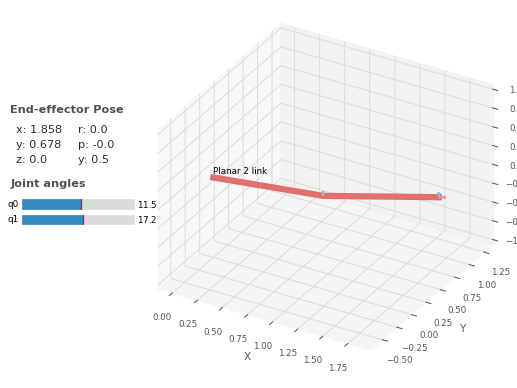

In [23]:
#Create symbolic variables a1, a2, a3, a4 , q1, q2, q3 and q4 to represent the link lengths and the joint angles
robot = rtb.models.DH.Planar2()
print(robot)
robot.q=[0.2, 0.3]
robot.teach()

In [24]:
robot.fkine(robot.q)

SE3:   0.877583   -0.479426    0           1.85765      
       0.479426    0.877583    0           0.678095     
       0           0           1           0            
       0           0           0           1            
    

In [25]:
robot = rtb.models.DH.Puma560()
print(robot)

┏━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ    ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃       0 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃       0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃ 0.15005 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃  0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃       0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃       0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴──────┴───────┴─────┴──────┴─────┘



<IPython.core.display.Javascript object>


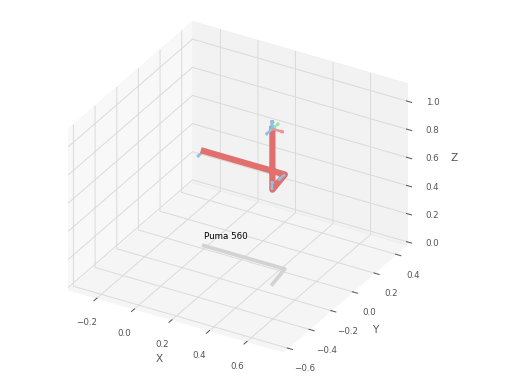

<IPython.core.display.Javascript object>


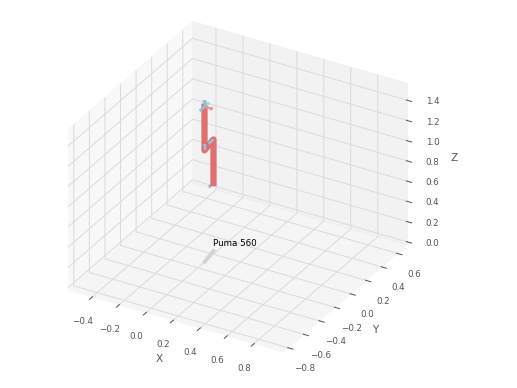

In [28]:
robot.plot(robot.q)
robot.plot(robot.qr)

In [30]:
robot.fkine([0.1, 0.2, 0.3, 0, 0, 0])

SE3:   0.873198   -0.0998334  -0.47703     0.247803     
       0.0876121   0.995004   -0.0478627  -0.12594      
       0.479426    0           0.877583    1.14629      
       0           0           0           1            
    